In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats
import networkx as nx

## Data acquisition

#### RATINGS (userId / itemId)

In [2]:
column_list = ['user id', 'item id', 'rating', 'timestamp']
data_content =  pd.read_csv('ml-100k/u.data', delimiter='\t', names=column_list) 
data_content.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### USERS (age, gender, occupation & location)

In [3]:
column_list = ['user id', 'age' , 'gender' , 'occupation' , 'zip code']
user_content =  pd.read_csv('ml-100k/u.user', delimiter='\|', names=column_list, index_col=column_list[0], engine="python")
user_content.head()

,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


#### MOVIES (Name & Categories)

In [4]:
column_list = ['movie id', 'movie title', 'release date', 'video release date','IMDb URL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War',' Western']
item_content =  pd.read_csv('ml-100k/u.item', delimiter='\|', names=column_list, index_col=column_list[0], engine="python")
item_content.head()

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,Comedy,...,fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
#item_content['Average_rate'] = average_df
#item_content

#### USER-MOVIE Combined:

In [6]:
# Define the number of users and the number of movies
NB_USERS = len(user_content)
NB_MOVIES = len(item_content)

user_movie_rating = np.zeros((NB_USERS, NB_MOVIES)) 
for u_id in range(1, NB_USERS+1): #first id is 1
    for index, row in data_content.loc[data_content['user id'] == u_id].iterrows():
        user_movie_rating[u_id - 1][row['item id'] - 1] = row['rating'] #first id is 1

users_movies_df = pd.DataFrame(user_movie_rating)
users_movies_df.columns = list(range(1, NB_MOVIES+1)) #first id is 1
users_movies_df.index = list(range(1, NB_USERS+1)) #first id is 1
users_movies_df = users_movies_df.rename_axis("movie_id", axis="columns")
users_movies_df = users_movies_df.rename_axis("user_id", axis="rows")

users_movies_df.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Exploration

#### RATINGS DF EXPLORATION

In [7]:
NB_RATINGS = len(data_content)
NB_RATINGS

100000

In [8]:
data_content['rating'].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

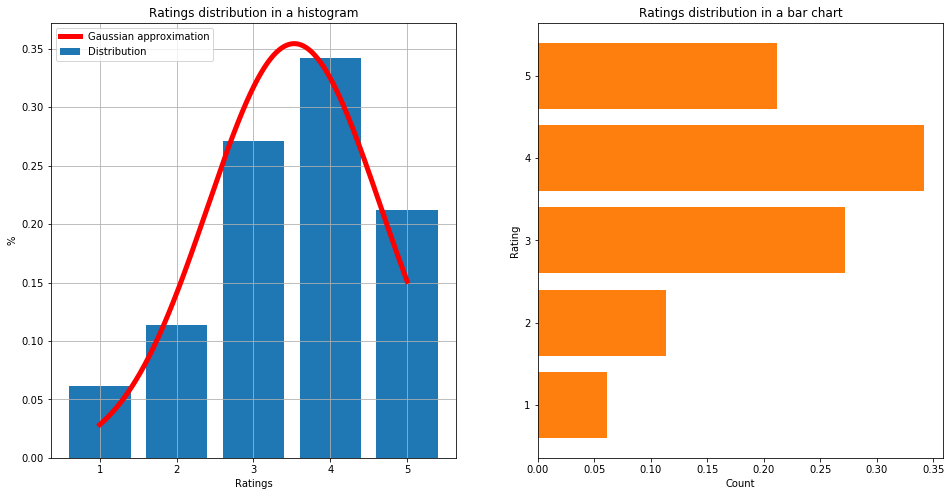

	--> Average ratings :  3.52986 / 5
	--> Standard deviation of the ratings :  1.125673599144316
	--> Number of ratings :  100000


In [9]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
n, bins, patches = plt.hist(data_content['rating'], np.arange(0.5, 5.6, 1), density=True, rwidth=0.8)
plt.grid(True)
x = np.linspace(1.0, 5.0, 1000)
y = scipy.stats.norm.pdf(x, data_content['rating'].mean(), data_content['rating'].std())
plt.plot(x, y, color='red', linewidth=5)
plt.xlabel("Ratings")
plt.ylabel("%")
plt.legend(["Gaussian approximation", "Distribution"])
plt.title("Ratings distribution in a histogram")

#plt.subplot(122)
#plt.pie(n, labels=list(range(1, 6)), autopct='%1.1f%%', shadow=False) #startangle=90, counterclock=False)
#plt.title("Ratings distribution in a pie")
#plt.show()

plt.subplot(122)
colors = ['tab:orange']
plt.barh(list(range(1, 6)), width=n, color=colors)
plt.xlabel("Count")
plt.ylabel("Rating")
plt.title("Ratings distribution in a bar chart")
plt.show()

print("\t--> Average ratings : ", data_content['rating'].mean(), "/ 5")
print("\t--> Standard deviation of the ratings : ", data_content['rating'].std())
print("\t--> Number of ratings : ", NB_RATINGS)

___________________________________________________________________________________________________________________

### USERS DF EXPLORATION

In [10]:
# Define the number of categories from the Movies (i.e. item_content) dataframe
only_categories = item_content.drop(columns=["movie title", "release date", "video release date", "IMDb URL"])
categories_total = dict(only_categories.sum(axis=0))
NB_CATEGORIES = len(categories_total)
NB_CATEGORIES_SELECTED = sum(categories_total.values())

print(NB_CATEGORIES)
print(NB_CATEGORIES_SELECTED)

19
2893


In [11]:
gender_user_count = user_content['gender'].value_counts()
gender_user_count

M    670
F    273
Name: gender, dtype: int64

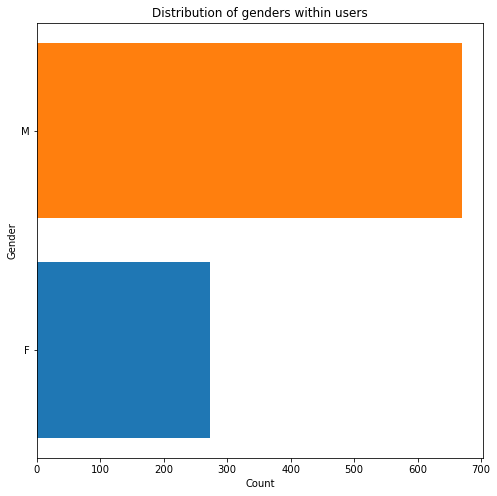

	--> Number of users :  943


In [12]:
# Reverse to show from largest to smallest
gender_labels = list(gender_user_count.keys())
gender_labels.reverse()
gender_user_count_list = list(gender_user_count)
gender_user_count_list.reverse()

plt.figure(figsize=(8, 8))
colors = ['tab:blue', 'tab:orange']
plt.barh(gender_labels, width=gender_user_count_list, color=colors)
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Distribution of genders within users")
plt.show()

print("\t--> Number of users : ", NB_USERS)

In [13]:
age_user = user_content['age']
age_user_min = min(age_user)
age_user_max = max(age_user)
age_user_mean = age_user.mean()
age_user_std = age_user.std()

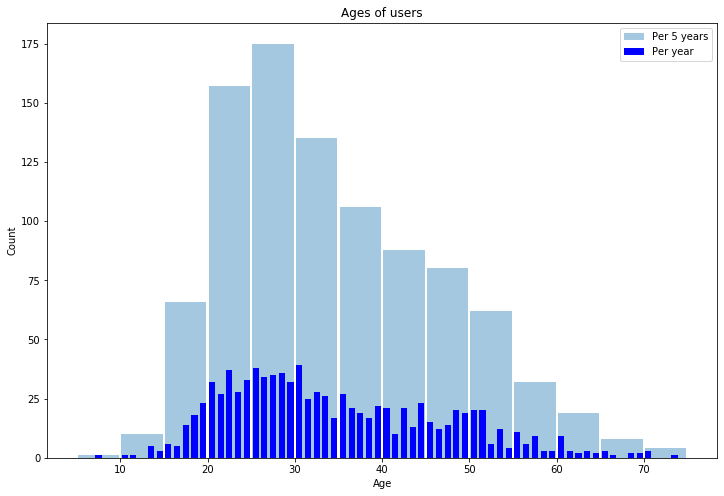

	--> Min age of users :  7
	--> Max age of users :  73
	--> Mean of ages of users :  34.05196182396607
	--> Standart deviation of ages of users :  12.192739733059032


In [14]:
plt.figure(figsize=(12, 8))
plt.hist(age_user, np.arange(5, 76, 5), rwidth=0.95, alpha=0.4)
plt.hist(age_user, np.arange(5, 76, 1), rwidth=0.7, color='blue')
plt.legend(["Per 5 years", "Per year"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Ages of users")
plt.show()

print("\t--> Min age of users : ", age_user_min)
print("\t--> Max age of users : ", age_user_max)
print("\t--> Mean of ages of users : ", age_user_mean)
print("\t--> Standart deviation of ages of users : ", age_user_std)

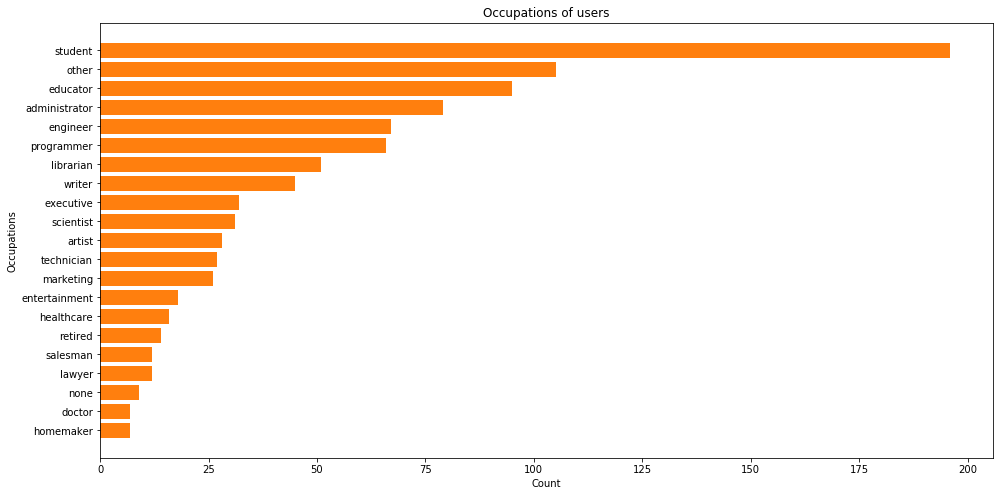

	--> Number of categories :  19
	--> Number of  :  2893


In [15]:
occupation_user_count = user_content['occupation'].value_counts()
NB_OCCUPATION = len(occupation_user_count)

categories_total = {k: v for k, v in sorted(occupation_user_count.items(), key=lambda item: item[1])} #sort the dict
labels = list(occupation_user_count.keys())
sizes = list(occupation_user_count.values)

# Reverse the lists so that it is sorted from largest to smallest
labels.reverse()
sizes.reverse()

plt.figure(figsize=(16, 8))
plt.barh(labels, width=sizes, color='tab:orange')
plt.xlabel("Count")
plt.ylabel("Occupations")
plt.title("Occupations of users")
plt.show()

print("\t--> Number of categories : ", NB_CATEGORIES)
print("\t--> Number of  : ", NB_CATEGORIES_SELECTED)

In [16]:
user_content['zip code'].value_counts()

55414    9
55105    6
55337    5
20009    5
10003    5
        ..
64118    1
29201    1
64131    1
02324    1
94115    1
Name: zip code, Length: 795, dtype: int64

#### User Feature-Graph:

In [17]:
users_attributes_content = user_content.copy()
users_attributes_content.head()

,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


#### Create Gender Features:

In [18]:
# Find male users, store as numpy array of 1s and 0s, then add as new column to users_attributes_content
males = users_attributes_content['gender'].str.match('M').astype(int).to_numpy()
users_attributes_content['male'] = males

# Find female users, store as numpy array of 1s and 0s, then add as new column to users_attributes_content
females = users_attributes_content['gender'].str.match('F').astype(int).to_numpy()
users_attributes_content['female'] = females

# Drop the original 'gender' column as it is no longer needed
users_attributes_content = users_attributes_content.drop(columns=['gender'])

# Visualize the result
users_attributes_content.tail()

,age,occupation,zip code,male,female
user id,,,,,
939,26,student,33319,0,1
940,32,administrator,02215,1,0
941,20,student,97229,1,0
942,48,librarian,78209,0,1
943,22,student,77841,1,0


#### Create Occupation Features:


In [19]:
# Get the list of occupations from u.occupation
# Probably a better way to do this, but just want it to be easy for now...
column_list = ['occupations']
occupations_df = pd.read_csv('ml-100k/u.occupation', names=column_list)
occupations_np_array = occupations_df['occupations'].to_numpy()

# Iteratate over the occupations to add them as features to the users_attributes_content dataframe
for occupation in (occupations_np_array):
    # Find occupation, store as numpy array of 1s and 0s, then add as new column to users_attributes_content
    occupation_feature_to_add = users_attributes_content['occupation'].str.match(occupation).astype(int).to_numpy()
    users_attributes_content[occupation] = occupation_feature_to_add
    
# Drop the original 'occupation' column as it is no longer needed
users_attributes_content = users_attributes_content.drop(columns=['occupation'])
    
# Visualize the result
users_attributes_content.head()

,age,zip code,male,female,administrator,artist,doctor,educator,engineer,entertainment,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
user id,,,,,,,,,,,,,,,,,,,,,
1,24,85711,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,53,94043,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,23,32067,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,24,43537,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,33,15213,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Create Age Features:

In [20]:
# Find age_range of users, store as numpy array of 1s and 0s, then add as new column to users_attributes_content
# Range: 0-9
age_range_gt = users_attributes_content['age'].ge(0).to_numpy()
age_range_lt = users_attributes_content['age'].lt(10).to_numpy()
age_range_and = np.logical_and(age_range_lt,age_range_gt).astype(int)
users_attributes_content['0-9'] = age_range_and

# Range: 10-19
age_range_gt = users_attributes_content['age'].ge(10).to_numpy()
age_range_lt = users_attributes_content['age'].lt(20).to_numpy()
age_range_and = np.logical_and(age_range_lt,age_range_gt).astype(int)
users_attributes_content['10-19'] = age_range_and

# Range: 20-29
age_range_gt = users_attributes_content['age'].ge(20).to_numpy()
age_range_lt = users_attributes_content['age'].lt(30).to_numpy()
age_range_and = np.logical_and(age_range_lt,age_range_gt).astype(int)
users_attributes_content['20-29'] = age_range_and

# Range: 30-39
age_range_gt = users_attributes_content['age'].ge(30).to_numpy()
age_range_lt = users_attributes_content['age'].lt(40).to_numpy()
age_range_and = np.logical_and(age_range_lt,age_range_gt).astype(int)
users_attributes_content['30-39'] = age_range_and

# Range: 40-49
age_range_gt = users_attributes_content['age'].ge(40).to_numpy()
age_range_lt = users_attributes_content['age'].lt(50).to_numpy()
age_range_and = np.logical_and(age_range_lt,age_range_gt).astype(int)
users_attributes_content['40-49'] = age_range_and

# Range: 50-59
age_range_gt = users_attributes_content['age'].ge(50).to_numpy()
age_range_lt = users_attributes_content['age'].lt(60).to_numpy()
age_range_and = np.logical_and(age_range_lt,age_range_gt).astype(int)
users_attributes_content['50-59'] = age_range_and

# Range: 60-69
age_range_gt = users_attributes_content['age'].ge(60).to_numpy()
age_range_lt = users_attributes_content['age'].lt(70).to_numpy()
age_range_and = np.logical_and(age_range_lt,age_range_gt).astype(int)
users_attributes_content['60-69'] = age_range_and

# Range: 70-79
age_range_gt = users_attributes_content['age'].ge(70).to_numpy()
age_range_lt = users_attributes_content['age'].lt(80).to_numpy()
age_range_and = np.logical_and(age_range_lt,age_range_gt).astype(int)
users_attributes_content['70-79'] = age_range_and

# Range: 80-89
age_range_gt = users_attributes_content['age'].ge(80).to_numpy()
age_range_lt = users_attributes_content['age'].lt(90).to_numpy()
age_range_and = np.logical_and(age_range_lt,age_range_gt).astype(int)
users_attributes_content['80-89'] = age_range_and

# Range: 90-99
age_range_gt = users_attributes_content['age'].ge(90).to_numpy()
age_range_lt = users_attributes_content['age'].lt(100).to_numpy()
age_range_and = np.logical_and(age_range_lt,age_range_gt).astype(int)
users_attributes_content['90-99'] = age_range_and

# Drop the original 'age' column as it is no longer needed
users_attributes_content = users_attributes_content.drop(columns=['age'])

# Visualize the result
users_attributes_content.tail()

,zip code,male,female,administrator,artist,doctor,educator,engineer,entertainment,executive,...,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
user id,,,,,,,,,,,,,,,,,,,,,
939,33319,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
940,02215,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
941,97229,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
942,78209,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
943,77841,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Create ZipCode Features:

Note: used Wikipedia page for understanding Zipcode format: https://en.wikipedia.org/wiki/ZIP_Code

In [21]:
# First find zipcodes that aren't integers (e.g. Alphanumeric zipcodes) and place them in 'Other' Category
# Likely these are Canadian postal codes which were placed into the American zipcode format (e.g. V6T 1Z4 --> V6T1Z)
other_zipcodes_inverted = users_attributes_content['zip code'].str.isnumeric().to_numpy()
# Have to invert because we want the alphanumeric zipcodes to be '1'
other_zipcodes = np.logical_not(other_zipcodes_inverted).astype(int)
users_attributes_content['other_zipcodes'] = other_zipcodes

# Get indices of "other zipcodes"
other_zipcode_indices = np.argwhere(other_zipcodes).flatten()
# Get numeric zipcodes and replace the 'other' zipcodes with an arbitrarily high number
numeric_zipcodes = users_attributes_content['zip code'].copy()
numeric_zipcodes_np = numeric_zipcodes.to_numpy()
np.put(numeric_zipcodes_np,other_zipcode_indices,[99999])

# Get the first digits of all the zipcodes
# Note the 9 will need some postprocessing due the replacing of alphanumeric zipcodes
zipcodes_first_dig = numeric_zipcodes_np.astype(int).copy()
zipcodes_first_dig = zipcodes_first_dig // 10**4 % 10

# Find all instances where the first digit of the zipcode is: 1
dig_1 = np.isin(zipcodes_first_dig,1)
users_attributes_content['zip_1'] = dig_1.astype(int)

# Find all instances where the first digit of the zipcode is: 2
dig_2 = np.isin(zipcodes_first_dig,2)
users_attributes_content['zip_2'] = dig_2.astype(int)

# Find all instances where the first digit of the zipcode is: 3
dig_3 = np.isin(zipcodes_first_dig,3)
users_attributes_content['zip_3'] = dig_3.astype(int)

# Find all instances where the first digit of the zipcode is: 4
dig_4 = np.isin(zipcodes_first_dig,4)
users_attributes_content['zip_4'] = dig_4.astype(int)

# Find all instances where the first digit of the zipcode is: 5
dig_5 = np.isin(zipcodes_first_dig,5)
users_attributes_content['zip_5'] = dig_5.astype(int)

# Find all instances where the first digit of the zipcode is: 6
dig_6 = np.isin(zipcodes_first_dig,6)
users_attributes_content['zip_6'] = dig_6.astype(int)

# Find all instances where the first digit of the zipcode is: 7
dig_7 = np.isin(zipcodes_first_dig,7)
users_attributes_content['zip_7'] = dig_7.astype(int)

# Find all instances where the first digit of the zipcode is: 8
dig_8 = np.isin(zipcodes_first_dig,8)
users_attributes_content['zip_8'] = dig_8.astype(int)

# Find all instances where the first digit of the zipcode is: 9
dig_9 = np.isin(zipcodes_first_dig,9).astype(int)
# Note, need to correct for the alphanumeric zipcode replacement
np.put(dig_9,other_zipcode_indices,[0])
users_attributes_content['zip_9'] = dig_9.astype(int)

# Drop the original 'zip code' column as it is no longer needed
users_attributes_content = users_attributes_content.drop(columns=['zip code'])

# Visualize the result
users_attributes_content.tail()

,male,female,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,...,other_zipcodes,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8,zip_9
user id,,,,,,,,,,,,,,,,,,,,,
939,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
940,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
942,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
943,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Create Adjacency Matrix:

In [22]:
# Create a copy to use later
users_attributes_content_copy = users_attributes_content.copy()

# Convert to array
users_attributes_content = np.array(users_attributes_content)
#users_attributes_content = np.where(users_attributes_content == 'M', 10, users_attributes_content)
#users_attributes_content = np.where(users_attributes_content == 'F', 0, users_attributes_content)
users_attributes_content = users_attributes_content.astype(np.int32)

In [23]:
distance_users_attributes = np.zeros((NB_USERS, NB_USERS))
A_users_attributes = np.zeros((NB_USERS, NB_USERS))

In [24]:
from scipy.spatial import distance

In [25]:
for user_idx in range(NB_USERS):
    for user_idx2 in range(NB_USERS): 
        if user_idx != user_idx2:
            dst = distance.euclidean(users_attributes_content[user_idx], users_attributes_content[user_idx2])
            distance_users_attributes[user_idx][user_idx2] = dst
        else:
            distance_users_attributes[user_idx][user_idx2] = 0

In [26]:
# Display the mean distance between users based on their features
mean_distance_us_att = distance_users_attributes.mean()
mean_distance_us_att

2.369783094489285

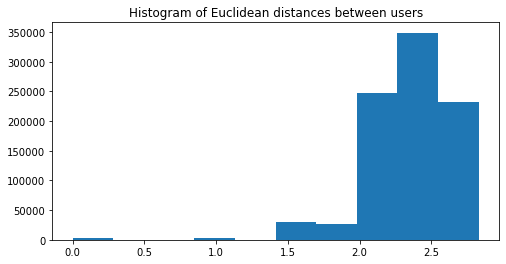

In [27]:
# Plot a histogram of the euclidean distances
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of Euclidean distances between users")
plt.hist(distance_users_attributes.flatten());

In [28]:
# Choose the mean_distance as the threshold
threshold = mean_distance_us_att

for i in range(A_users_attributes.shape[0]):
    for j in range(A_users_attributes.shape[1]):
        if i != j:
            if distance_users_attributes[i][j] < threshold:
                A_users_attributes[i][j] = 1

#### Degree Distribution:

In [29]:
num_nodes_users_attributes = NB_USERS
num_edges_users_attributes = int(np.where(A_users_attributes > 0, 1, 0).sum() / 2)
print(f"Number of nodes in the users graph: {num_nodes_users_attributes}")
print(f"Number of edges in the users graph: {num_edges_users_attributes}")

Number of nodes in the users graph: 943
Number of edges in the users graph: 153468


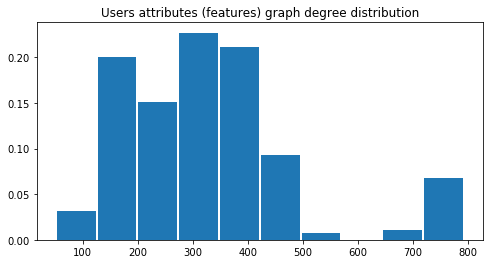

In [30]:
degrees_users_attributes = A_users_attributes.sum(axis=1)

deg_hist_normalization = np.ones(degrees_users_attributes.shape[0]) / degrees_users_attributes.shape[0]

plt.figure(figsize=(8, 4))
plt.title('Users attributes (features) graph degree distribution')
plt.hist(degrees_users_attributes, weights=deg_hist_normalization, rwidth=0.95);

In [31]:
feat_moment_1 = degrees_users_attributes.mean()
feat_moment_2 = (degrees_users_attributes**2).mean()

print(f"1st moment of feature graph: {feat_moment_1}")
print(f"2nd moment of feature graph: {feat_moment_2}")

1st moment of feature graph: 325.48886532343585
2nd moment of feature graph: 130095.6967126193


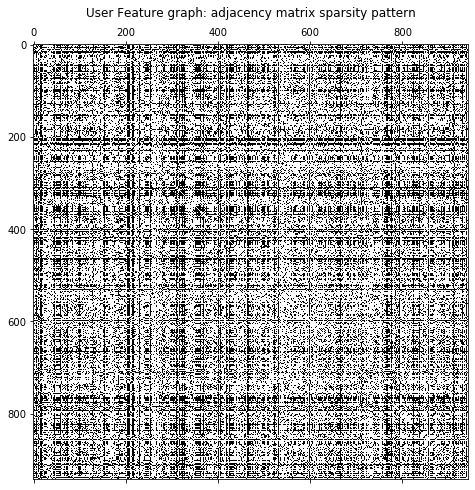

In [32]:
# Observe sparsity pattern of the graph:
plt.figure(figsize=(8, 8))
plt.title('User Feature graph: adjacency matrix sparsity pattern')
plt.spy(A_users_attributes);

#### Network Model for User Feature-Graph:

In [33]:
import networkx as nx

In [93]:
G_feature = nx.from_numpy_matrix(A_users_attributes)
print('Number of nodes: {}, Number of edges: {}'. format(G_feature.number_of_nodes(), G_feature.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_feature.number_of_selfloops(), nx.number_connected_components(G_feature)))

Number of nodes: 943, Number of edges: 153468
Number of self-loops: 0, Number of connected components: 1


#### Clustering coefficient:

In [94]:
nx.average_clustering(G_feature)

0.6772231270030881

#### Epsilon Similarity Graph for User Feature-Graph:

In [36]:
from scipy.spatial.distance import pdist, squareform
def epsilon_similarity_graph(X: np.ndarray, sigma=1, epsilon=0):
    """ X (n x d): coordinates of the n data points in R^d.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    #Computation of Weighted adjacency matrix (Kernel rbf)
    distance_condensed = pdist(X, 'euclidean') 
    distance_redundant = squareform(distance_condensed)
    K_rbf = np.exp(-(distance_redundant**2)/(2*(sigma**2)))
                    
    #Display results
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    plt.scatter(distance_redundant[::100], K_rbf[::100])
    plt.plot([distance_condensed.min(), distance_condensed.max()], [epsilon, epsilon], 'r-', lw=2)
    plt.legend(("threshold", "with sigma="+str(sigma)))
    plt.xlabel("dist(i, j)")
    plt.ylabel("w(i,j)")
    
    #W other way to calculate K_rbf = W
    K_rbf = np.where(K_rbf < epsilon, 0, K_rbf) - np.eye(K_rbf.shape[0])
    adjacency = K_rbf
    
    #Display results
    plt.subplot(1, 3, 3)
    counts, bins = np.histogram(adjacency)
    plt.title('Adjacency degree distribution')
    plt.hist(bins[:-1], bins, weights = counts)
    plt.show()
    
    return adjacency

In [37]:
def distanceMean(X: np.ndarray):
    distance_condensed = pdist(X, 'euclidean')
    return distance_condensed.mean()

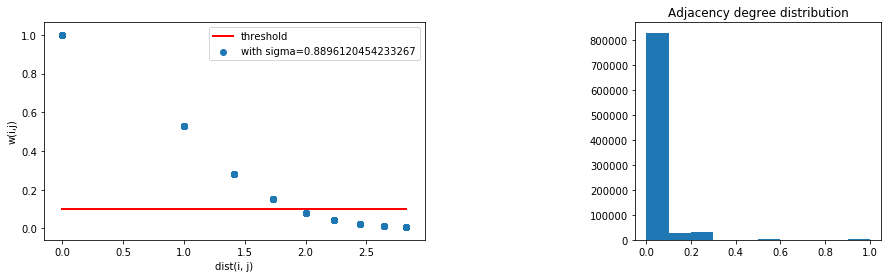

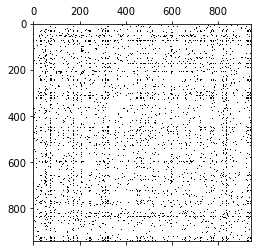

In [38]:
adjacency = epsilon_similarity_graph(users_attributes_content_copy, sigma=distanceMean(users_attributes_content_copy)*0.375, epsilon=0.1)
plt.spy(adjacency)
plt.show()

#### Laplacian:


In [39]:
def compute_laplacian(adjacency: np.ndarray, normalize: bool):
    """ Return:
        L (n x n ndarray): combinatorial or symmetric normalized Laplacian.
    """
    D = np.diag(np.sum(adjacency, 1)) # Degree matrix
    combinatorial = D - adjacency
    if normalize:
        D_norm = np.diag(np.clip(np.sum(adjacency, 1), 1, None)**(-1/2))
        return D_norm @ combinatorial @ D_norm
    else:
        return combinatorial  

In [40]:
laplacian_comb = compute_laplacian(adjacency, normalize=False)
laplacian_norm = compute_laplacian(adjacency, normalize=True)

In [41]:
def spectral_decomposition(laplacian: np.ndarray):
    """ Return:
        lamb (np.array): eigenvalues of the Laplacian
        U (np.ndarray): corresponding eigenvectors.
    """
    return np.linalg.eigh(laplacian)

In [42]:
lamb_comb, U_comb = spectral_decomposition(laplacian_comb)
lamb_norm, U_norm = spectral_decomposition(laplacian_norm)

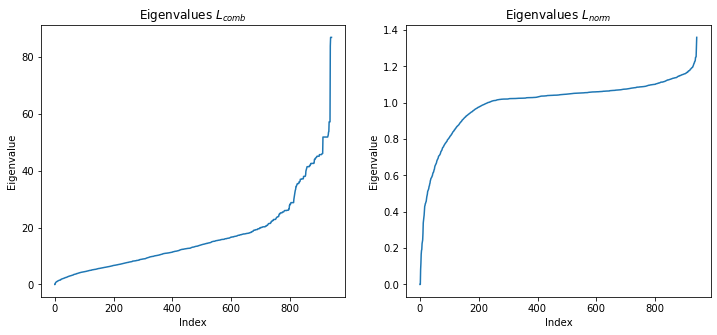

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(lamb_comb)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{comb}$')
plt.subplot(122)
plt.plot(lamb_norm)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{norm}$')
plt.show()

______________________________________________________________________________________________________

### MOVIES DF EXPLORATION

In [44]:
# Get a movie's 'average rating' based off the ratings from each user in the user_movies_df
average_df = users_movies_df.sum(axis=0)
average_df = average_df/ users_movies_df.astype(bool).sum(axis=0)
average_df

movie_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Length: 1682, dtype: float64

In [45]:
# Add this new average rating as a column in the item_content dataframe
item_content['Average_rate'] = average_df

# Display the updated dataframe to see the change
item_content.head()

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Average_rate
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,3.878319
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,3.206107
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.033333
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.550239
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.302326


In [46]:
full_dates = item_content['release date'].values
all_years = []
for date in full_dates:
    if date is not np.nan :
        year = date[-4:]
        all_years.append(int(year))
all_years = np.array(sorted(all_years))

min_year = all_years.min()
max_year = all_years.max()

In [47]:
only_categories = item_content.drop(columns=["movie title", "release date", "video release date", "IMDb URL", "Average_rate"])
categories_total = dict(only_categories.sum(axis=0))
NB_CATEGORIES = len(categories_total)
NB_CATEGORIES_SELECTED = sum(categories_total.values())

categories_total = {k: v for k, v in sorted(categories_total.items(), key=lambda item: item[1])} #sort the dict
labels = list(categories_total.keys())
sizes = list(categories_total.values())

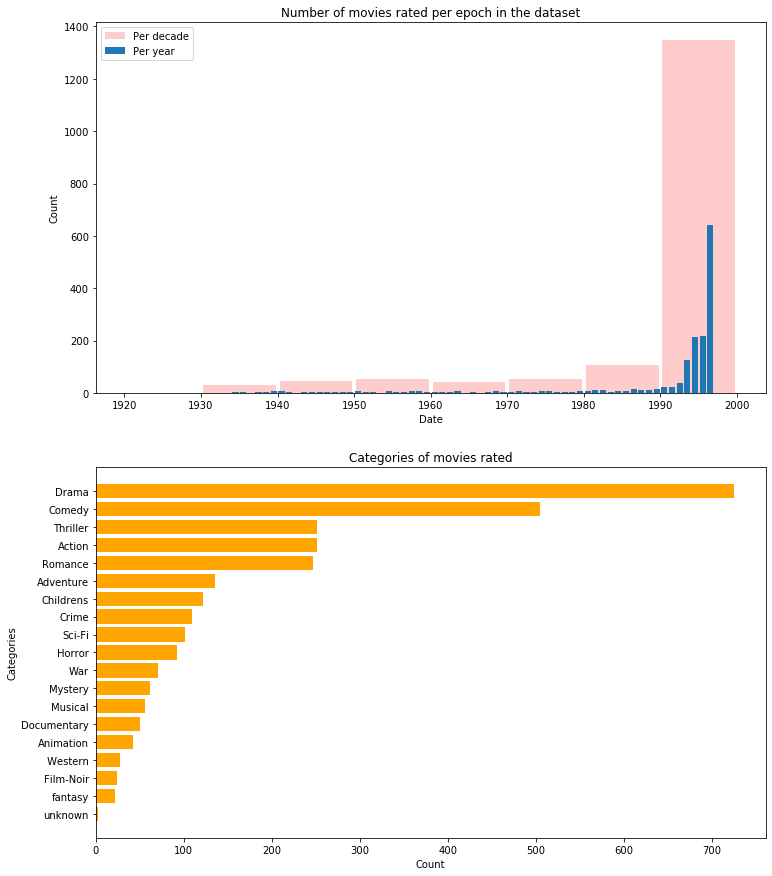

REF to figure 1:
	--> Number of movies rated :  1682
	--> Epoch of movies rated :  1922 to 1998

REF to figure 2:
	--> Number of categories :  19
	--> Number of :  2893


In [48]:
plt.figure(figsize=(12, 15))

plt.subplot(211)
plt.hist(all_years, np.arange(1920, 2001, 10), density=False, rwidth=0.95, alpha=0.2, color='red')
plt.hist(all_years, np.arange(min_year, max_year, 1), density=False, rwidth=0.8)
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(["Per decade", "Per year"])
plt.title("Number of movies rated per epoch in the dataset")

plt.subplot(212)
plt.barh(labels, width=sizes, color='orange')
plt.xlabel("Count")
plt.ylabel("Categories")
plt.title("Categories of movies rated")
plt.show()

print("REF to figure 1:")
print("\t--> Number of movies rated : ", NB_MOVIES)
print("\t--> Epoch of movies rated : ", min_year, 'to', max_year)

print("\nREF to figure 2:")
print("\t--> Number of categories : ", NB_CATEGORIES)
print("\t--> Number of : ", NB_CATEGORIES_SELECTED)

In [49]:
movies_content = item_content.drop(columns=["movie title", "release date", "video release date", "IMDb URL"])
movies_content

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Average_rate
movie id,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000
1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3.000000
1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2.000000


#### Create Adjacency Matrix:

In [50]:
movies_content = np.array(movies_content)
distance_movies = np.zeros((NB_MOVIES, NB_MOVIES))
A_movies = np.zeros((NB_MOVIES, NB_MOVIES))

In [51]:
for movie_idx in range(NB_MOVIES):
    for movie_idx2 in range(NB_MOVIES):
        #similiraty = np.logical_and(movies_content[movie_idx], movies_content[movie_idx2])
        #_max = max(movies_content[movie_idx].sum(), movies_content[movie_idx2].sum())
        #score = similiraty.sum() / _max 
        if movie_idx != movie_idx2:
            dst = distance.euclidean(movies_content[movie_idx], movies_content[movie_idx2])
            distance_movies[movie_idx][movie_idx2] = dst
        else:
            distance_movies[movie_idx][movie_idx2] = 0

In [52]:
# Display the mean distance between movies based on their features
mean_distance_mov_att = distance_movies.mean()
mean_distance_mov_att

1.8872894312091437

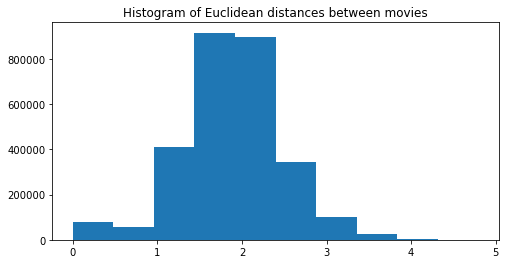

In [53]:
# Plot a histogram of the euclidean distances
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of Euclidean distances between movies")
plt.hist(distance_movies.flatten());

In [54]:
# Choose the mean_distance as the threshold
threshold = mean_distance_mov_att

for i in range(A_movies.shape[0]):
    for j in range(A_movies.shape[1]):
        if i != j:
            if distance_movies[i][j] < threshold:
                A_movies[i][j] = 1

#### Feature Degree Distribution:

In [55]:
num_nodes_movies_attributes = NB_MOVIES
num_edges_movies_attributes = int(np.where(A_movies > 0, 1, 0).sum() / 2)
print(f"Number of nodes in the users graph: {num_nodes_movies_attributes}")
print(f"Number of edges in the users graph: {num_edges_movies_attributes}")

Number of nodes in the users graph: 1682
Number of edges in the users graph: 702929


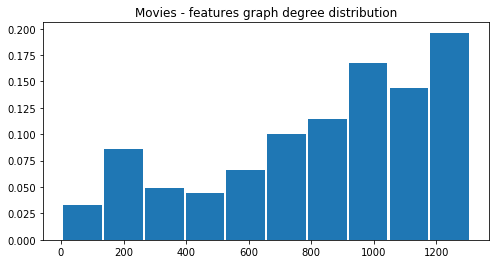

In [56]:
degrees_movies_attributes = A_movies.sum(axis=1)

deg_hist_normalization = np.ones(degrees_movies_attributes.shape[0]) / degrees_movies_attributes.shape[0]

plt.figure(figsize=(8, 4))
plt.title('Movies - features graph degree distribution')
plt.hist(degrees_movies_attributes, weights=deg_hist_normalization, rwidth=0.95);

In [57]:
feat_moment_1 = degrees_movies_attributes.mean()
feat_moment_2 = (degrees_movies_attributes**2).mean()

print(f"1st moment of feature graph: {feat_moment_1}")
print(f"2nd moment of feature graph: {feat_moment_2}")

1st moment of feature graph: 835.8252080856124
2nd moment of feature graph: 826409.6932223543


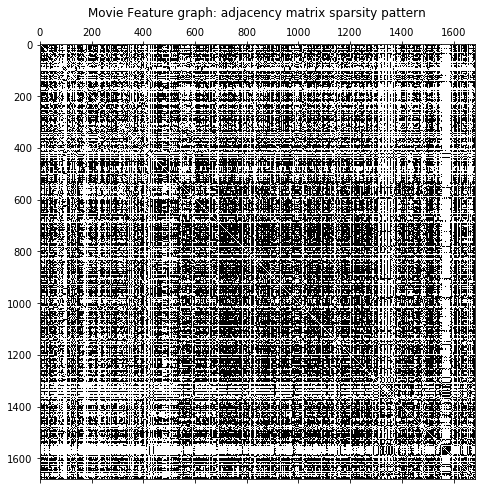

In [58]:
# Observe sparsity pattern of the graph:
plt.figure(figsize=(8, 8))
plt.title('Movie Feature graph: adjacency matrix sparsity pattern')
plt.spy(A_movies);

#### Clustering coefficient:

In [59]:
import networkx as nx

In [60]:
G_feature = nx.from_numpy_matrix(A_movies)
print('Number of nodes: {}, Number of edges: {}'. format(G_feature.number_of_nodes(), G_feature.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G_feature.number_of_selfloops(), nx.number_connected_components(G_feature)))

Number of nodes: 1682, Number of edges: 702929
Number of self-loops: 0, Number of connected components: 1


In [61]:
nx.average_clustering(G_feature)

0.7668447200533061

#### Epsilon Similarity Graph for Movie Feature-Graph:

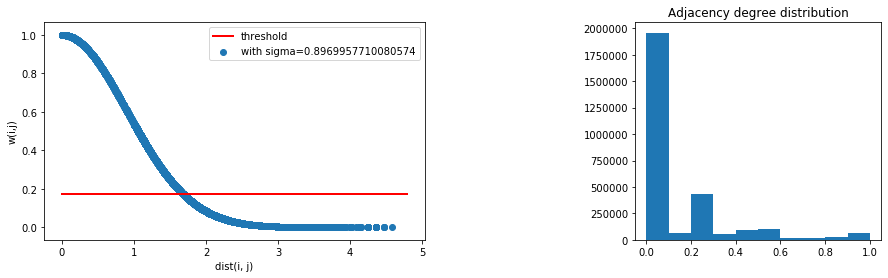

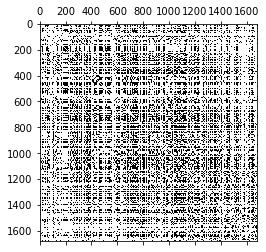

In [62]:
adjacency = epsilon_similarity_graph(movies_content, sigma=distanceMean(movies_content)*0.475, epsilon=0.175)
plt.spy(adjacency)
plt.show()

In [63]:
laplacian_comb = compute_laplacian(adjacency, normalize=False)
laplacian_norm = compute_laplacian(adjacency, normalize=True)

In [64]:
lamb_comb, U_comb = spectral_decomposition(laplacian_comb)
lamb_norm, U_norm = spectral_decomposition(laplacian_norm)

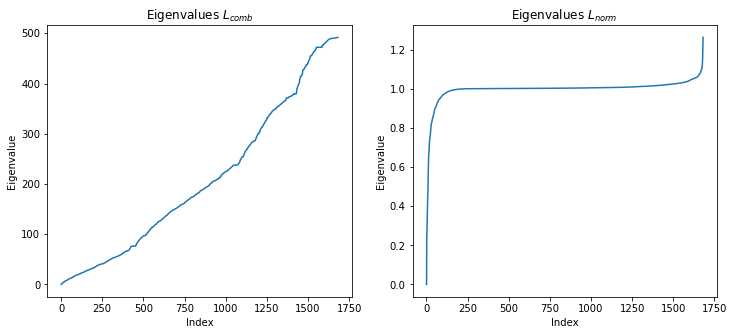

In [65]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(lamb_comb)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{comb}$')
plt.subplot(122)
plt.plot(lamb_norm)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{norm}$')
plt.show()

In [66]:
def compute_number_connected_components(lamb: np.array, threshold: float):
    """ lamb: array of eigenvalues of a Laplacian
        Return:
        n_components (int): number of connected components.
    """
    n_components = np.count_nonzero(lamb < threshold)
    return (n_components)

In [67]:
print(compute_number_connected_components(lamb_norm, threshold=1e-20))

1


#### Spectral clustering

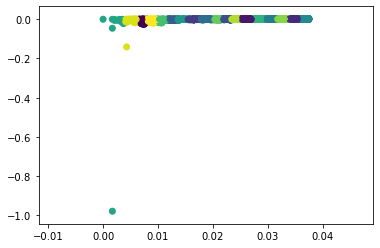

In [68]:
from sklearn.cluster import KMeans

x = U_norm[:, 1]
x = x.reshape(-1, 1)
y = U_norm[:, 2] 
kmeans = KMeans(n_clusters=18)
y_pred = kmeans.fit_predict(x)
plt.scatter(x,y, c=y_pred)
plt.show()

In [69]:
class SpectralClustering():
    def __init__(self, n_classes: int, normalize: bool):
        self.n_classes = n_classes
        self.normalize = normalize
        self.laplacian = None
        self.e = None
        self.U = None
        self.clustering_method = KMeans(n_classes)
        
         
    def fit_predict(self, adjacency):
        """ Your code should be correct both for the combinatorial
            and the symmetric normalized spectral clustering.
            Return:
            y_pred (np.ndarray): cluster assignments.
        """
        self.laplacian = compute_laplacian(adjacency, self.normalize)
        self.e, self.U = spectral_decomposition(self.laplacian)
        self.U = self.U[:,:2]  #compute eigenvectors of k smallest eigenvalues U=[u1|u2|...uk] watchOUT it starts with 1
        y_pred = KMeans(n_clusters = self.n_classes).fit_predict(self.U)
        return y_pred

Connected components: 1


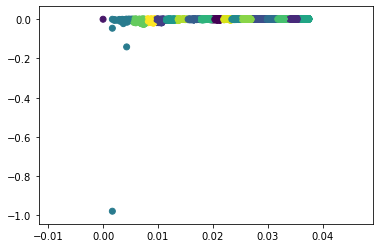

In [70]:
print("Connected components:", compute_number_connected_components(lamb_norm, threshold=1e-30))
spectral_clustering = SpectralClustering(n_classes=18, normalize=True)
y_pred = spectral_clustering.fit_predict(adjacency)
plt.scatter(U_norm[:, 1], U_norm[:, 2], c=y_pred)
plt.show()

__________________________________________________________________________________________________

## Data Exploitation

### USER - MOVIE DF

In [71]:
user_movie_rating = np.zeros((NB_USERS, NB_MOVIES)) 
for u_id in range(1, NB_USERS+1): #first id is 1
    for index, row in data_content.loc[data_content['user id'] == u_id].iterrows():
        user_movie_rating[u_id - 1][row['item id'] - 1] = row['rating'] #first id is 1

users_movies_df = pd.DataFrame(user_movie_rating)
users_movies_df.columns = list(range(1, NB_MOVIES+1)) #first id is 1
users_movies_df.index = list(range(1, NB_USERS+1)) #first id is 1
users_movies_df = users_movies_df.rename_axis("movie_id", axis="columns")
users_movies_df = users_movies_df.rename_axis("user_id", axis="rows")

users_movies_df

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
users_movies = np.array(users_movies_df).astype(np.int32)
users_movies

array([[5, 3, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]])

In [73]:
users_categories = np.zeros((NB_USERS ,NB_CATEGORIES))

In [74]:
# Reinitialize movies_content to remove extra "Average_rate" column we added earlier
movies_content = item_content.drop(columns=["movie title", "release date", "video release date", "IMDb URL", "Average_rate"])
movies_content = np.array(movies_content)

In [75]:
for user_idx in range(NB_USERS):
    for movie_idx in range(NB_MOVIES):
        if users_movies[user_idx][movie_idx] != 0:
            users_categories[user_idx] += movies_content[movie_idx]

In [76]:
users_categories_normalize = np.zeros((NB_USERS ,NB_CATEGORIES))
for row in range(users_categories.shape[0]):
    users_categories_normalize[row] = users_categories[row] / users_categories.sum(axis=1)[row]

In [77]:
pd.DataFrame(users_categories_normalize)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.001704,0.127768,0.071550,0.020443,0.042589,0.155026,0.042589,0.008518,0.182283,0.003407,0.001704,0.022147,0.022147,0.008518,0.074957,0.073254,0.088586,0.042589,0.010221
1,0.000000,0.081301,0.024390,0.008130,0.032520,0.130081,0.073171,0.000000,0.284553,0.008130,0.016260,0.016260,0.008130,0.032520,0.130081,0.032520,0.097561,0.024390,0.000000
2,0.000000,0.114754,0.032787,0.000000,0.000000,0.098361,0.081967,0.008197,0.180328,0.000000,0.016393,0.040984,0.016393,0.090164,0.040984,0.065574,0.172131,0.040984,0.000000
3,0.000000,0.142857,0.071429,0.000000,0.000000,0.071429,0.071429,0.017857,0.107143,0.000000,0.000000,0.017857,0.017857,0.089286,0.053571,0.107143,0.196429,0.035714,0.000000
4,0.002604,0.145833,0.085938,0.036458,0.075521,0.213542,0.023438,0.000000,0.070312,0.005208,0.002604,0.072917,0.031250,0.007812,0.049479,0.085938,0.049479,0.036458,0.005208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.000000,0.174757,0.097087,0.009709,0.009709,0.145631,0.029126,0.000000,0.174757,0.009709,0.000000,0.009709,0.009709,0.009709,0.097087,0.077670,0.116505,0.029126,0.000000
939,0.000000,0.098291,0.051282,0.008547,0.021368,0.179487,0.029915,0.000000,0.205128,0.000000,0.012821,0.017094,0.029915,0.012821,0.102564,0.081197,0.085470,0.064103,0.000000
940,0.000000,0.185185,0.129630,0.055556,0.037037,0.129630,0.018519,0.000000,0.092593,0.000000,0.000000,0.000000,0.018519,0.018519,0.018519,0.148148,0.129630,0.018519,0.000000
941,0.000000,0.102857,0.062857,0.022857,0.074286,0.125714,0.000000,0.000000,0.177143,0.011429,0.005714,0.017143,0.028571,0.051429,0.097143,0.034286,0.114286,0.057143,0.017143


In [78]:
#Cluster each user accordint to their categories
#Find best number of clusters thanks to the elbow method

from sklearn.cluster import KMeans

sse = {}
for k in range(1, 30):
    model = KMeans(n_clusters=k)
    y_pred  = model.fit_predict(users_categories_normalize)
    sse[k] = model.inertia_

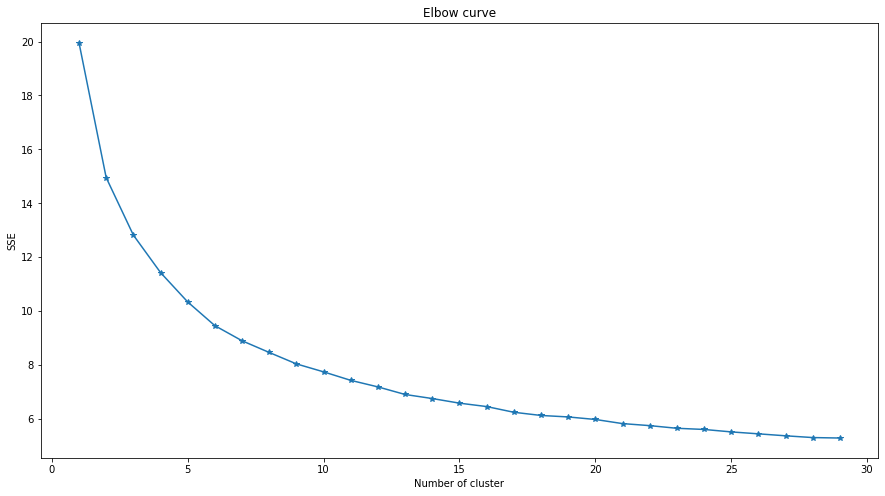

In [79]:
plt.figure(figsize=(15, 8))

plt.plot(list(sse.keys()), list(sse.values()), '-*')

plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbow curve")
plt.show()

In [80]:
#Thanks to the Elbow method, 6 clusters seems to be good ! 

N_CLUSTERS = 6
model = KMeans(n_clusters=N_CLUSTERS)
y_pred  = model.fit_predict(users_categories_normalize)

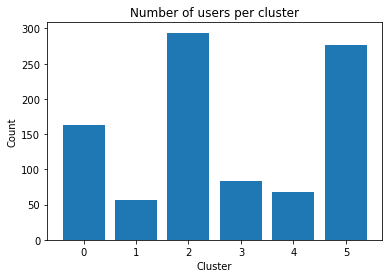

In [81]:
#Cluster analyze 1
CLUSTER, N_USERS_CLUSTER = np.unique(y_pred, return_counts=True)

plt.figure()
plt.bar(x=range(N_CLUSTERS), height=N_USERS_CLUSTER)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of users per cluster')
plt.show()

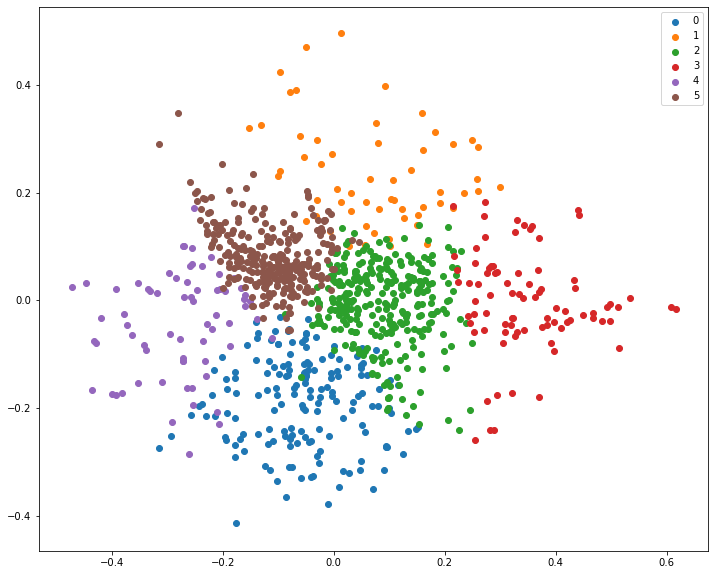

In [82]:
#Visualization of the clustering approach thanks to Isomap

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
X_embedded_2d = Isomap(n_components=2, n_neighbors=5).fit_transform(users_categories_normalize)

plt.figure(figsize=(12, 10))

for i in range(N_CLUSTERS):
    mask = y_pred == i
    plt.scatter(X_embedded_2d[mask, 0], X_embedded_2d[mask, 1], label=i)
plt.legend()
plt.show()

In [83]:
#Define the different cluster (user_id)

group_0 = np.argwhere(y_pred == 0).reshape(-1)
group_1 = np.argwhere(y_pred == 1).reshape(-1)
group_2 = np.argwhere(y_pred == 2).reshape(-1)
group_3 = np.argwhere(y_pred == 3).reshape(-1)
group_4 = np.argwhere(y_pred == 4).reshape(-1)
group_5 = np.argwhere(y_pred == 5).reshape(-1)

groups = [group_0, group_1, group_2, group_3, group_4, group_5]

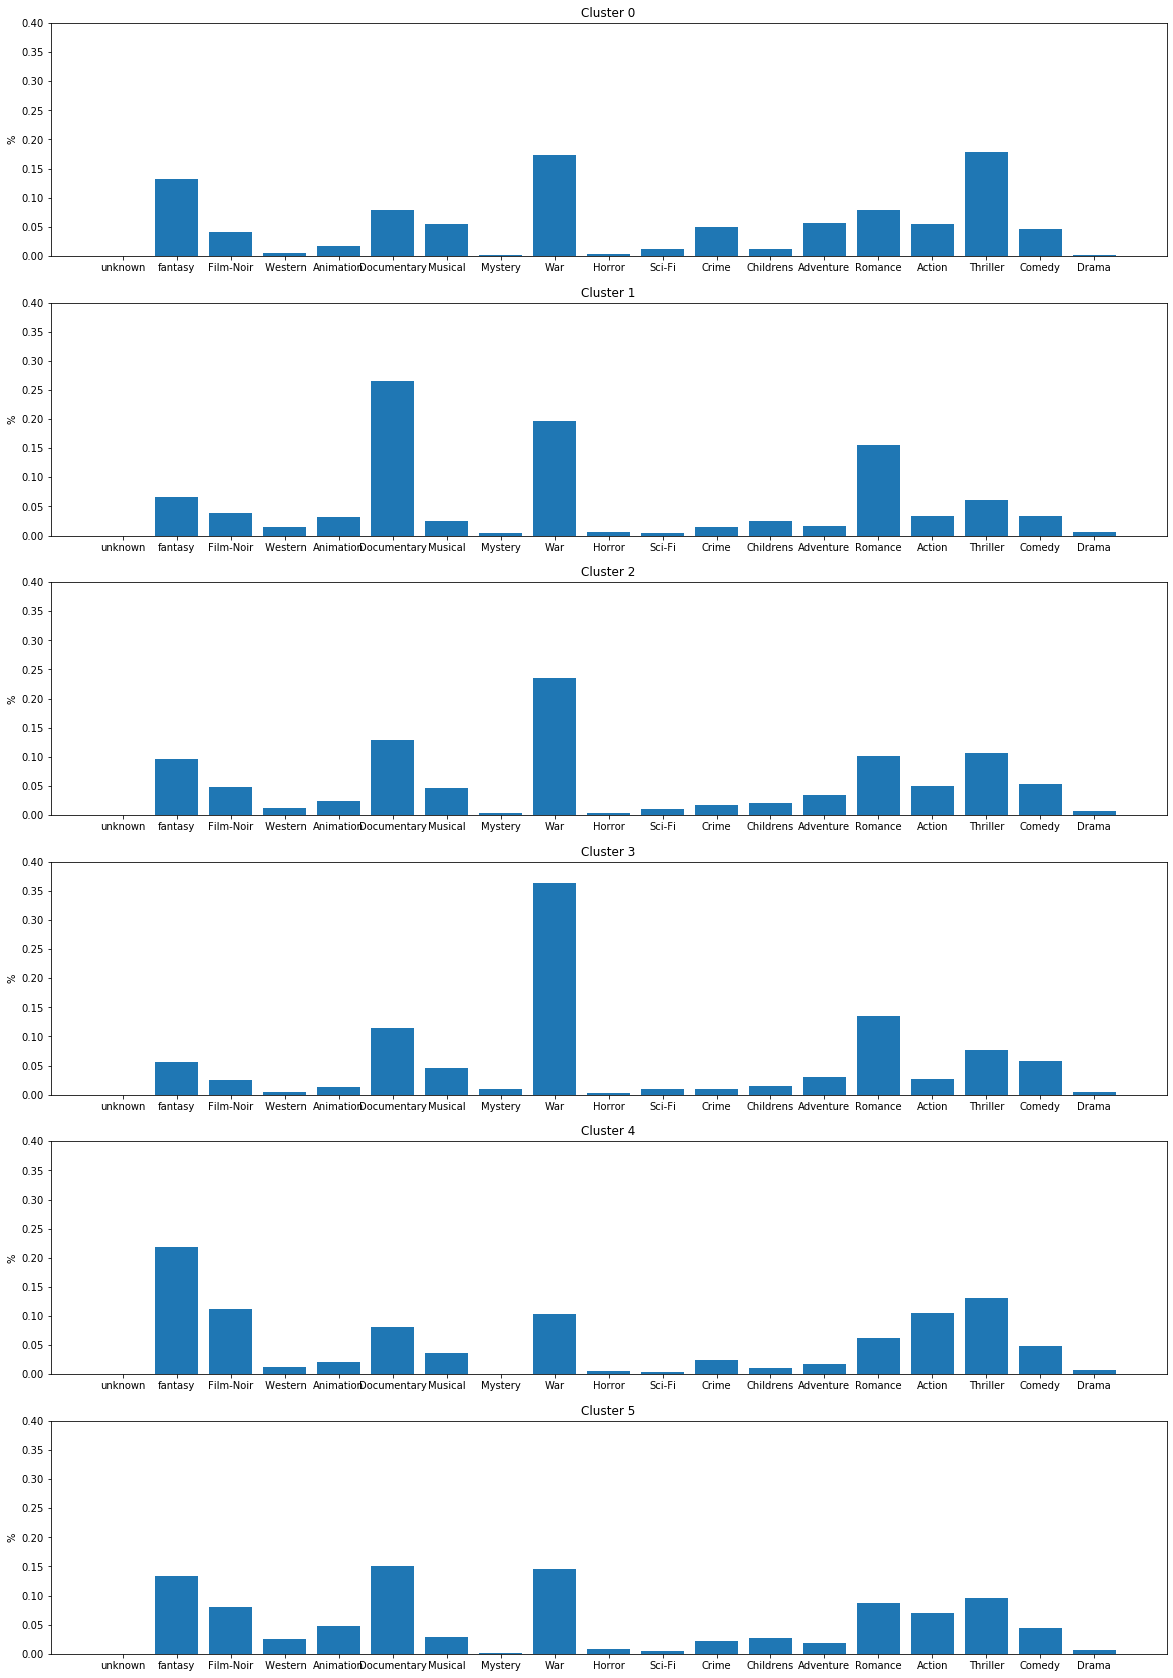

In [84]:
#Cluster analyze 2 : Ratio of ratings per categorie in each cluster

plt.figure(figsize=(20, 30))
plt.subplot(611)
plt.bar(x=list(categories_total.keys()), height=users_categories_normalize[group_0].mean(axis=0))
plt.ylabel('%')
plt.ylim([0, 0.4])
plt.title("Cluster 0")

plt.subplot(612)
plt.bar(x=list(categories_total.keys()), height=users_categories_normalize[group_1].mean(axis=0))
plt.ylabel('%')
plt.ylim([0, 0.4])
plt.title("Cluster 1")

plt.subplot(613)
plt.bar(x=list(categories_total.keys()), height=users_categories_normalize[group_2].mean(axis=0))
plt.ylabel('%')
plt.ylim([0, 0.4])
plt.title("Cluster 2")

plt.subplot(614)
plt.bar(x=list(categories_total.keys()), height=users_categories_normalize[group_3].mean(axis=0))
plt.ylabel('%')
plt.ylim([0, 0.4])
plt.title("Cluster 3")

plt.subplot(615)
plt.bar(x=list(categories_total.keys()), height=users_categories_normalize[group_4].mean(axis=0))
plt.ylabel('%')
plt.ylim([0, 0.4])
plt.title("Cluster 4")

plt.subplot(616)
plt.bar(x=list(categories_total.keys()), height=users_categories_normalize[group_5].mean(axis=0))
plt.ylabel('%')
plt.ylim([0, 0.4])
plt.title("Cluster 5")

plt.show()

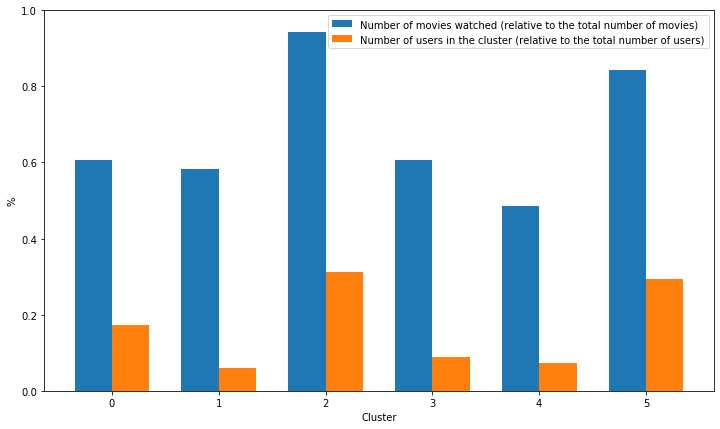

In [85]:
#Cluster analyze 3

ratio_movies_watched = []
for group in groups:
    ratio_movies_watched.append(np.where(users_movies[group].sum(axis = 0) > 0, 1, 0).sum() / NB_MOVIES)
    
plt.figure(figsize=(12, 7))
plt.bar(x=np.arange(N_CLUSTERS) - 0.35/2 , height=ratio_movies_watched, width=0.35)
plt.bar(x=np.arange(N_CLUSTERS) + 0.35/2 , height=N_USERS_CLUSTER/NB_USERS, width=0.35)
plt.ylim([0, 1])
plt.xlabel('Cluster')
plt.ylabel('%')
plt.legend(["Number of movies watched (relative to the total number of movies)", "Number of users in the cluster (relative to the total number of users)"])
plt.show()

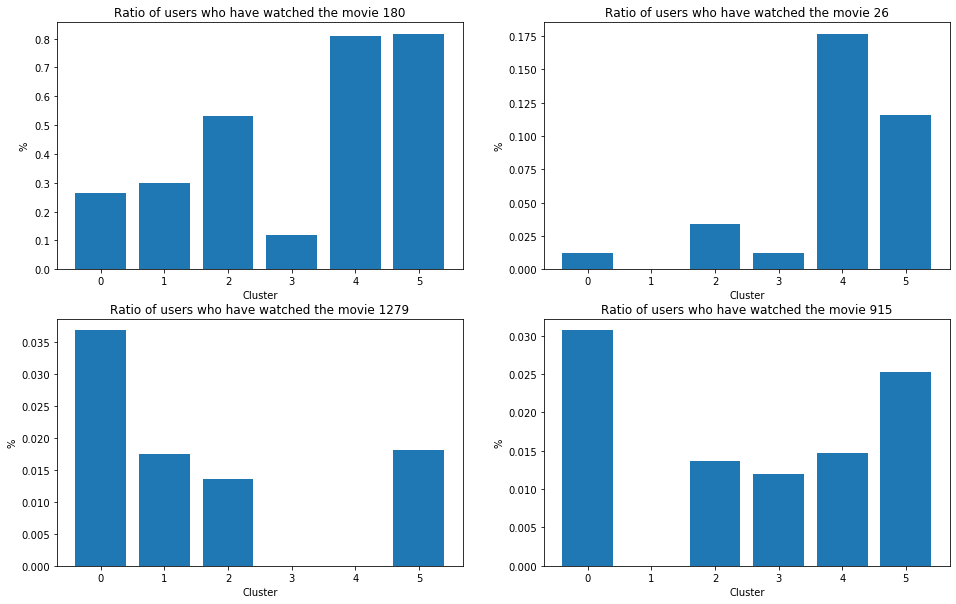

In [86]:
#Cluster analyze 4 : how a movie has been watched by users

movie_180_count_groups = []
movie_26_count_groups = []
movie_1279_count_groups = []
movie_915_count_groups = []
for group_idx, group in enumerate(groups):
    movie_180_count_groups.append(np.count_nonzero(users_movies[group], axis = 0)[180] / N_USERS_CLUSTER[group_idx])
    movie_26_count_groups.append(np.count_nonzero(users_movies[group], axis = 0)[26] / N_USERS_CLUSTER[group_idx])
    movie_1279_count_groups.append(np.count_nonzero(users_movies[group], axis = 0)[1279] / N_USERS_CLUSTER[group_idx])
    movie_915_count_groups.append(np.count_nonzero(users_movies[group], axis = 0)[915] / N_USERS_CLUSTER[group_idx])

plt.figure(figsize=(16, 10))

plt.subplot(221)
plt.bar(x=range(N_CLUSTERS), height=movie_180_count_groups)
plt.xlabel('Cluster')
plt.ylabel('%')
plt.title("Ratio of users who have watched the movie 180")

plt.subplot(222)
plt.bar(x=range(N_CLUSTERS), height=movie_26_count_groups)
plt.xlabel('Cluster')
plt.ylabel('%')
plt.title("Ratio of users who have watched the movie 26")

plt.subplot(223)
plt.bar(x=range(N_CLUSTERS), height=movie_1279_count_groups)
plt.xlabel('Cluster')
plt.ylabel('%')
plt.title("Ratio of users who have watched the movie 1279")

plt.subplot(224)
plt.bar(x=range(N_CLUSTERS), height=movie_915_count_groups)
plt.xlabel('Cluster')
plt.ylabel('%')
plt.title("Ratio of users who have watched the movie 915")
plt.show()

In [87]:
#Recommandation model
#Average of ratings for each movie

ratings_movies = (users_movies.sum(axis = 0) / np.count_nonzero(users_movies, axis=0))
ratings_movies

array([3.87831858, 3.20610687, 3.03333333, ..., 2.        , 3.        ,
       3.        ])

In [88]:
#Average of ratings for each movie for each cluster 
#Sort the movie for each cluster according to these averages

ratings_mean_groups = []
movies_sort_groups = []
for group in groups:
    ratings_mean_group = users_movies[group].sum(axis = 0) / np.count_nonzero(users_movies[group], axis=0)
    ratings_mean_group = np.where(np.isnan(ratings_mean_group), 0, ratings_mean_group)
    movies_sort_group = np.argsort(ratings_mean_group)
    for i, v in enumerate(movies_sort_group):
        if ratings_mean_group[v] == 0:
            lim = i
    movies_sort_group = movies_sort_group[lim+1:]
    
    ratings_mean_groups.append(ratings_mean_group)
    movies_sort_groups.append(movies_sort_group)

C:\Users\Public\Miniconda3\envs\ntds_proj\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [89]:
def recommandation(user_id: int, number_recommandations: int):
    "Return a list of movie_id according to the ratings of movies and the group of the user."
    
    #Determine the group of the user
    for group_idx, group in enumerate(groups):
        if np.isin(group, user_id).any():
            break
    
    #Determine which movie the user has aready watched 
    user_has_watched = np.nonzero(users_movies[user_id])[0]
    cluster_have_watched = movies_sort_groups[group_idx]
    
    #Detemine which movie the user has not watched relative to his group
    user_has_not_watched = []
    for movie_id in cluster_have_watched:
        if np.isin(user_has_watched, movie_id).any() == False:
            user_has_not_watched.append(movie_id)
    
    #Determine the "ratings" of these movies by tacking into account the rating of the cluster and the rating of all users: 
    ratings_recommandation = np.zeros((NB_MOVIES))
    for movie_id in user_has_not_watched:
        ratings_recommandation[movie_id] = (ratings_movies[movie_id] + ratings_mean_groups[group_idx][movie_id]) / 2
    
    #Sort these ratings
    user_recommandation = np.argsort(ratings_recommandation)
    
    #Return
    if len(user_recommandation) > number_recommandations:
        return user_recommandation[-number_recommandations:], group_idx
    else:
        return user_recommandation, group_idx

In [90]:
def display_recommandation(user_recommandation, group_idx):
    for i, movie_id in enumerate(user_recommandation):
        print("-- Recommandation ", i+1, "--")
        print("\tTitle: ", item_content.iloc[movie_id][0])
        print("\tRelease date: ", item_content.iloc[movie_id][1])
        print("\tCluster rating: ", ratings_mean_groups[group_idx][movie_id], "/5")
        print("\tRating of all users: ", ratings_movies[movie_id], "/5")
        print("\tCategorie(s): ", [k for k, v in (item_content.iloc[movie_id].items()) if v==1])
        print()

In [91]:
#Test these recommandation system with the user_id = 189
user_recommandation, group_idx = recommandation(189, 8)
display_recommandation(user_recommandation, group_idx)

-- Recommandation  1 --
	Title:  Schindler's List (1993)
	Release date:  01-Jan-1993
	Cluster rating:  4.666666666666667 /5
	Rating of all users:  4.466442953020135 /5
	Categorie(s):  ['Drama', 'War']

-- Recommandation  2 --
	Title:  Henry V (1989)
	Release date:  01-Jan-1989
	Cluster rating:  5.0 /5
	Rating of all users:  4.137096774193548 /5
	Categorie(s):  ['Drama', 'War']

-- Recommandation  3 --
	Title:  Thin Man, The (1934)
	Release date:  01-Jan-1934
	Cluster rating:  5.0 /5
	Rating of all users:  4.15 /5
	Categorie(s):  ['Mystery']

-- Recommandation  4 --
	Title:  Raise the Red Lantern (1991)
	Release date:  01-Jan-1991
	Cluster rating:  5.0 /5
	Rating of all users:  4.155172413793103 /5
	Categorie(s):  ['Drama']

-- Recommandation  5 --
	Title:  Kaspar Hauser (1993)
	Release date:  07-Jun-1996
	Cluster rating:  5.0 /5
	Rating of all users:  4.25 /5
	Categorie(s):  ['Drama']

-- Recommandation  6 --
	Title:  Shall We Dance? (1996)
	Release date:  11-Jul-1997
	Cluster rating: 